
Dataset Overview:
- **Source**: Created by Paulo Cortez and Aníbal Morais from University of Minho in 2007
- **Total Instances**: 517 records
- **Purpose**: Predicting forest fire burned area using meteorological and spatial data

Columns and Their Descriptions:

Spatial Coordinates:
1. **X**: x-axis coordinate in Montesinho park map (1-9)
2. **Y**: y-axis coordinate in Montesinho park map (2-9)

Temporal Features:
3. **month**: Month of the year (jan-dec)
4. **day**: Day of the week (mon-sun)

Fire Weather Index (FWI) System Indices:
5. **FFMC** (Fine Fuel Moisture Code): 18.7 to 96.20
   - Represents the moisture content of fine surface fuels
6. **DMC** (Duff Moisture Code): 1.1 to 291.3
   - Indicates moisture content of decomposing organic material
7. **DC** (Drought Code): 7.9 to 860.6
   - Represents long-term moisture deficit in deep, compact organic layers
8. **ISI** (Initial Spread Index): 0.0 to 56.10
   - Indicates the potential speed of fire spread

Environmental Conditions:
9. **temp**: Temperature in Celsius (2.2 to 33.30)
10. **RH**: Relative Humidity in % (15.0 to 100)
11. **wind**: Wind speed in km/h (0.40 to 9.40)
12. **rain**: Outside rain in mm/m² (0.0 to 6.4)

Target Variable:
13. **area**: Burned forest area in hectares (0.00 to 1090.84)
    - **Important Note**: The area is highly skewed towards 0.0
    - Recommended to use logarithmic transformation (ln(x+1)) for modeling

Key Characteristics:
- No missing values
- Highly imbalanced target variable (most instances have very small burned areas)
- Potentially correlated features
- Suitable for:
  - Regression tasks
  - Outlier detection
  - Feature selection techniques

Modeling Recommendations:
1. Apply logarithmic transformation to the target variable
2. Consider feature selection methods
3. Use cross-validation (as in the original study: 10-fold × 30 runs)
4. Be prepared for a challenging regression task

Suggested Target Approach:
- Primary Target: **area** (burned forest area)
- Transformation: ln(area + 1) for more normalized distribution
- Prediction Goal: Estimate the extent of forest fire damage based on meteorological and spatial conditions


In [1]:
import requests
import matplotlib.pyplot as plt
import seaborn as sns
# General libraries
import numpy as np
import pandas as pd


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import QuantileTransformer
from sklearn.compose import TransformedTargetRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel

# XGBoost library
from xgboost import XGBRegressor


In [2]:
  # shared link
shared_link = 'https://drive.google.com/file/d/1-j7thNXxdbISatdVzCi50KKquLTi0t_j/view?usp=sharing'

# Extract the file ID from the shared link
file_id = shared_link.split('/')[-2]
download_link = f'https://drive.google.com/uc?export=download&id={file_id}'

# Download the data set
response = requests.get(download_link)

# Save the Data temporarily (you can delete it later)
with open('Forest Fires.csv', 'wb') as f:
    f.write(response.content)
data=pd.read_csv('Forest Fires.csv')
data.head(20)


,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0
5,8,6,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.0
6,8,6,aug,mon,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.0
7,8,6,aug,mon,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,0.0
8,8,6,sep,tue,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,0.0
9,7,5,sep,sat,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,0.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [4]:

categorical_cols = data.select_dtypes(include=['object']).columns.tolist()

# Numerical columns
numerical_cols = data.select_dtypes(include=['number']).columns.tolist()

print("Categorical Columns:", categorical_cols)
print("Numerical Columns:", numerical_cols)

Categorical Columns: ['month', 'day']
Numerical Columns: ['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area']


In [5]:
data.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [6]:
data.describe(include=['object'])

,month,day
count,517,517
unique,12,7
top,aug,sun
freq,184,95


In [7]:

# Check for duplicate rows
duplicate_rows = data[data.duplicated()]

if not duplicate_rows.empty:
    print("Duplicate rows found:")
    print(duplicate_rows)
else:
    print("No duplicate rows found.")


Duplicate rows found:
     X  Y month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain   area
53   4  3   aug  wed  92.1  111.2  654.1   9.6  20.4  42   4.9   0.0   0.00
100  3  4   aug  sun  91.4  142.4  601.4  10.6  19.8  39   5.4   0.0   0.00
215  4  4   mar  sat  91.7   35.8   80.8   7.8  17.0  27   4.9   0.0  28.66
303  3  6   jun  fri  91.1   94.1  232.1   7.1  19.2  38   4.5   0.0   0.00


In [8]:
# Drop duplicate rows
data = data.drop_duplicates()

# Verify if duplicates have been removed
duplicate_rows = data[data.duplicated()]

if not duplicate_rows.empty:
    print("Duplicate rows still found:")
    print(duplicate_rows)
else:
    print("All duplicate rows removed successfully.")

All duplicate rows removed successfully.



Examine data distributions.


Check for skewness in the target variable (area).


Transform the area column using ln(area+1) for normalization.

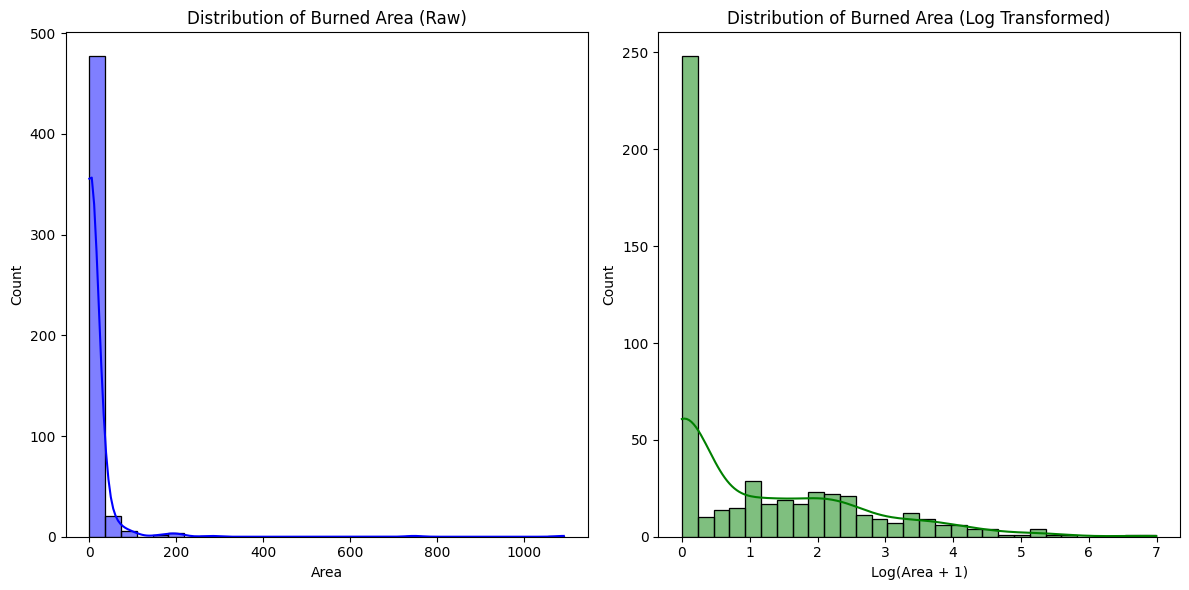

In [9]:


# Check the distribution of the target variable 'area'
plt.figure(figsize=(12, 6))

# Raw distribution of 'area'
plt.subplot(1, 2, 1)
sns.histplot(data['area'], bins=30, kde=True, color='blue')
plt.title('Distribution of Burned Area (Raw)')
plt.xlabel('Area')

# Log-transformed distribution of 'area'
data['log_area'] = np.log1p(data['area'])
plt.subplot(1, 2, 2)
sns.histplot(data['log_area'], bins=30, kde=True, color='green')
plt.title('Distribution of Burned Area (Log Transformed)')
plt.xlabel('Log(Area + 1)')

plt.tight_layout()
plt.show()


Encode categorical variables (month, day).

In [10]:
# Create mappings for 'month' and 'day'
month_mapping = {
    'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6,
    'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12
}

day_mapping = {
    'mon': 1, 'tue': 2, 'wed': 3, 'thu': 4, 'fri': 5, 'sat': 6, 'sun': 7
}

# Apply the mappings to the DataFrame
data['month'] = data['month'].map(month_mapping)
data['day'] = data['day'].map(day_mapping)

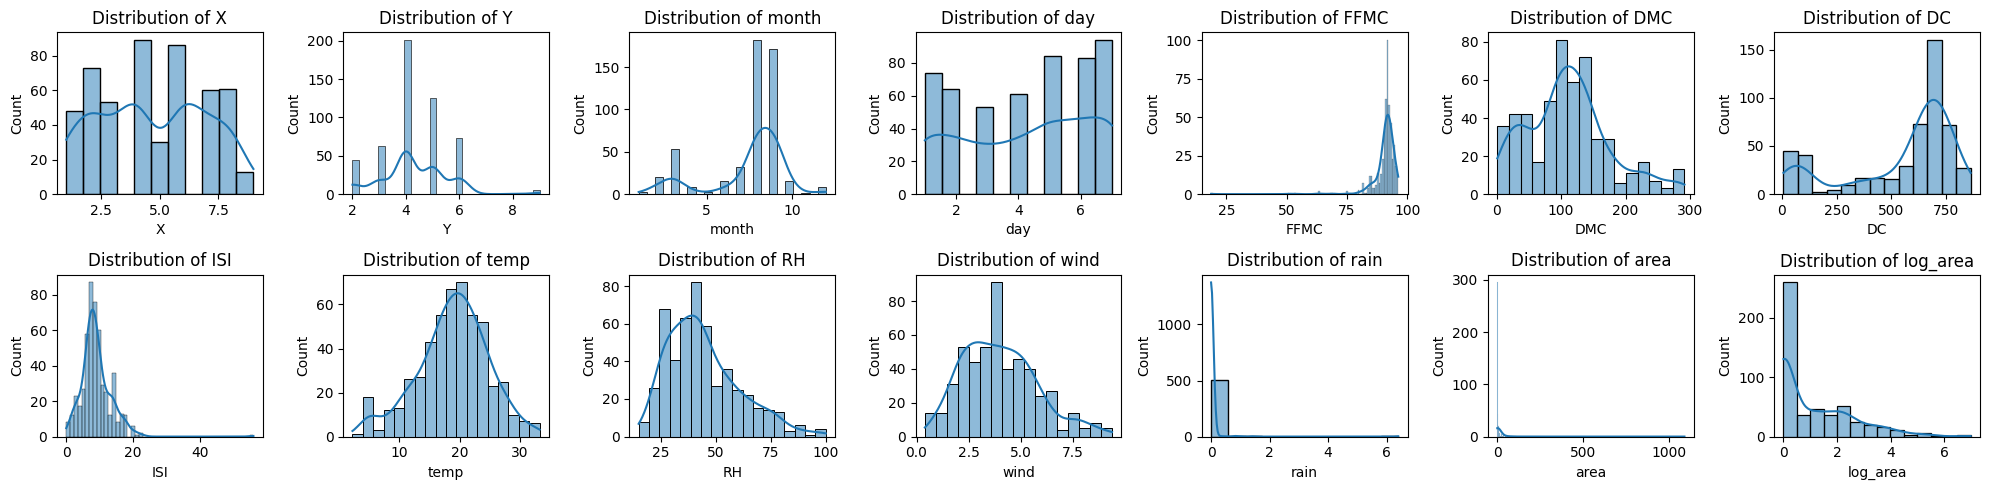

In [11]:
# Plotting distributions for all numerical columns
plt.figure(figsize=(20, 5))  # Adjust figure size for better visualization

for i, col in enumerate(data):
    plt.subplot(2, 7, i + 1)  # Create subplots for each column
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)

plt.tight_layout()  # Adjust spacing between subplots
plt.show()

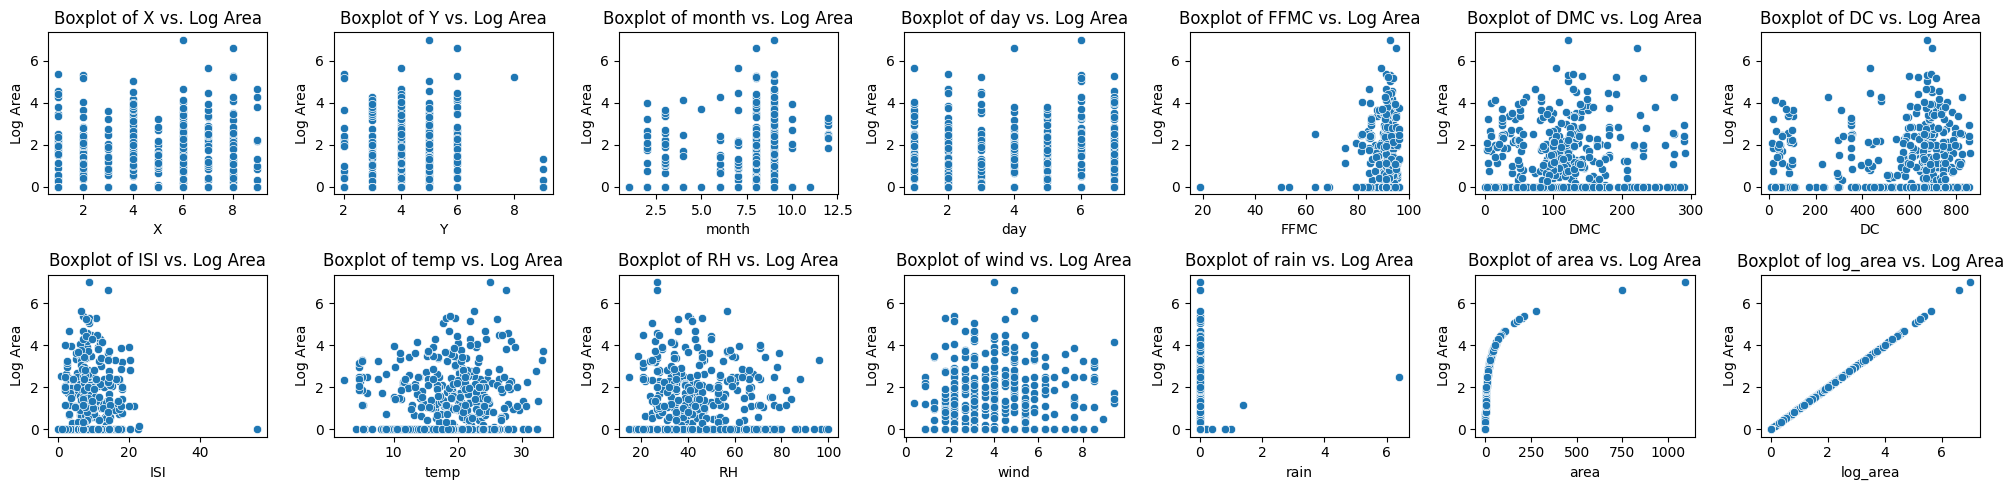

In [12]:
# Plotting boxplots for all numerical columns against log-transformed area
plt.figure(figsize=(20, 5))  # Adjust figure size as needed

for i, col in enumerate(data):
    plt.subplot(2, 7, i + 1)  # Create subplots
    sns.scatterplot(x=col, y='log_area', data=data)
    plt.title(f'Boxplot of {col} vs. Log Area')
    plt.xlabel(col)
    plt.ylabel('Log Area')

plt.tight_layout()
plt.show()

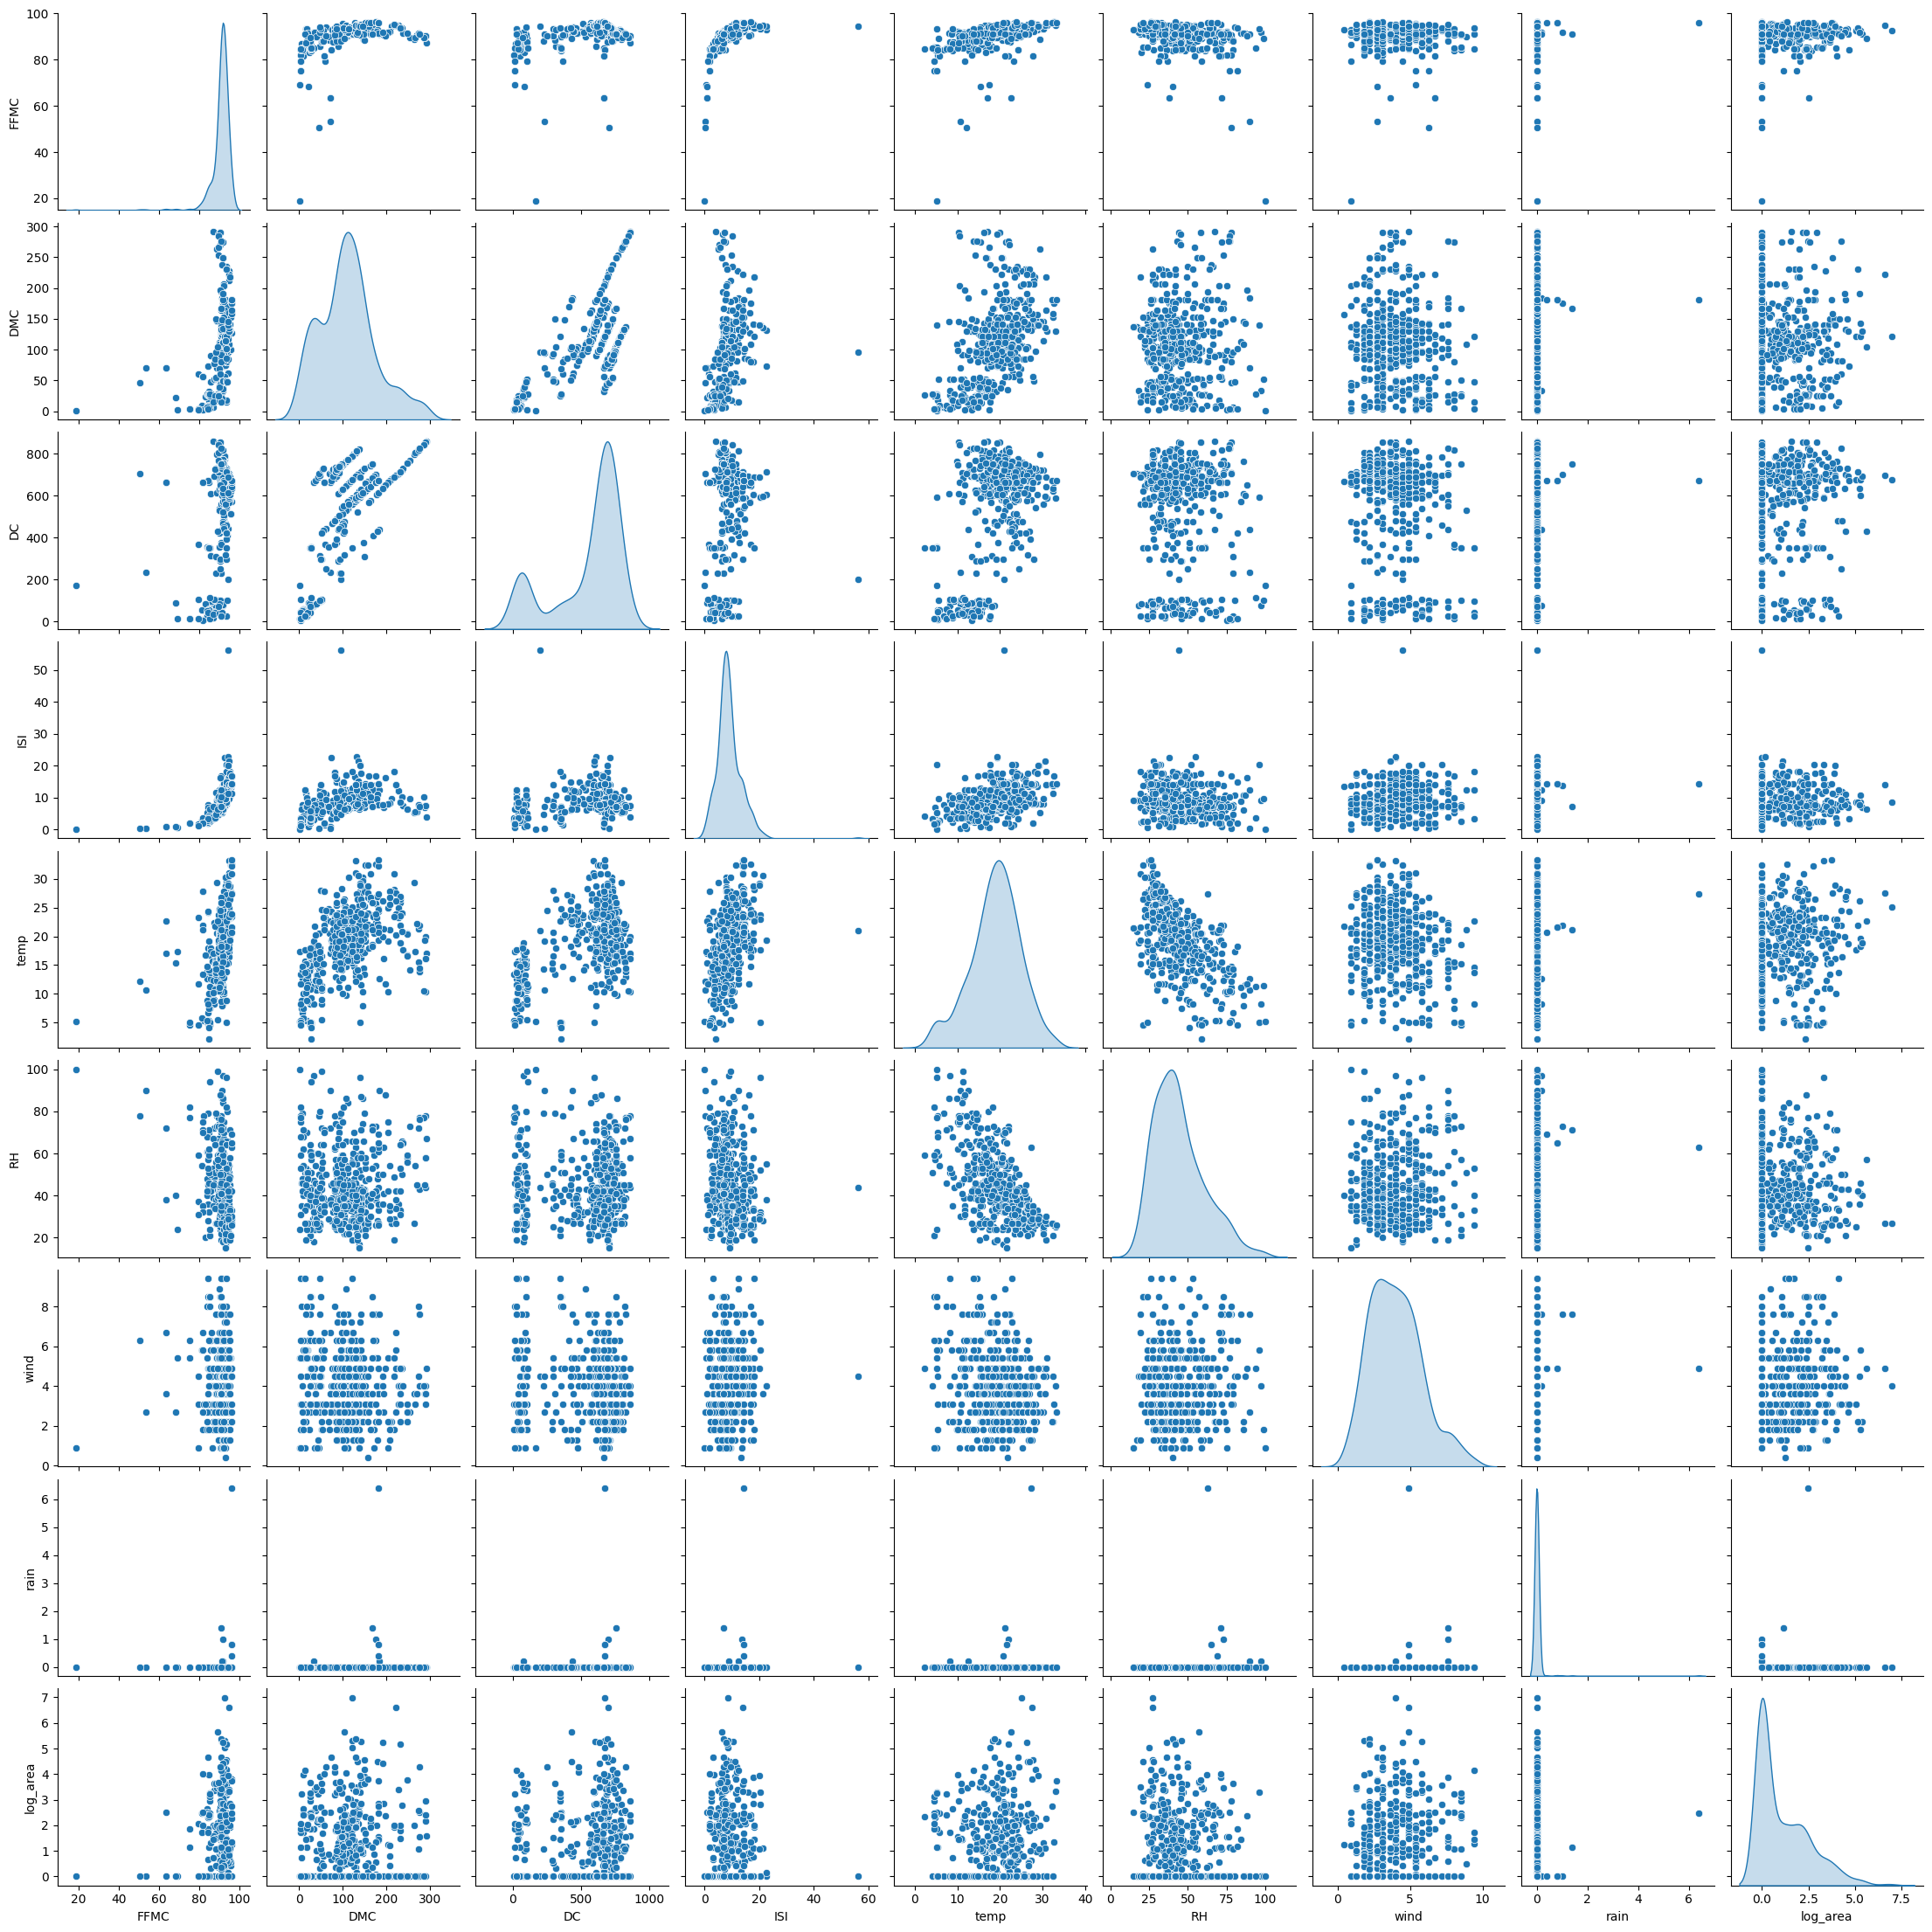

In [13]:
# Pair plot of selected features
sns.pairplot(data[['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'log_area']], diag_kind='kde')
plt.show()

Text(0.5, 1.0, 'Correlation Heatmap')

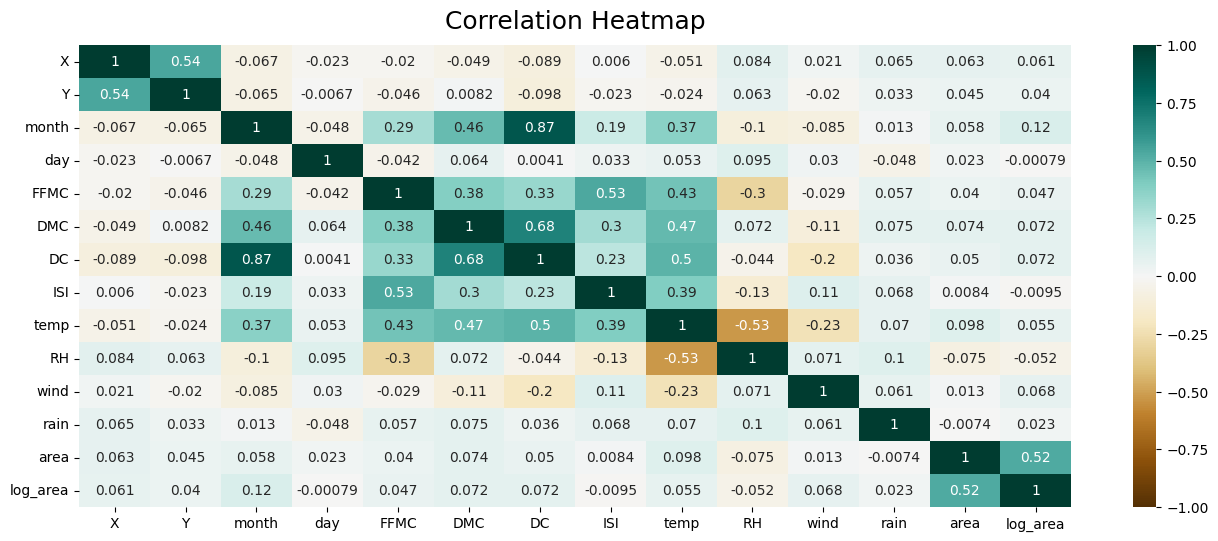

In [14]:
# Calculate the correlation matrix for numerical features including log_area
correlation_matrix = data.corr()

# Visualize the correlation matrix
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(correlation_matrix , vmin = -1, vmax = 1, annot = True, cmap = 'BrBG')
heatmap.set_title('Correlation Heatmap', fontdict = {'fontsize': 18}, pad = 12)



The correlation matrix highlights key relationships among the features:

1. **Significant Correlations**:
   - `FFMC`, `DMC`, and `ISI` are moderately correlated with each other, indicating a possible relationship in the Fire Weather Index system.
   - `temp` and `RH` show an inverse relationship, which aligns with meteorological expectations.
   - `log_area` shows weak to moderate correlations with features such as `ISI`, `temp`, and `wind`.

2. **Categorical Features**:
   - Month and day variables, encoded as dummy variables, show little correlation with `log_area`, but some might still hold predictive value.


<ipython-input-15-65367220e88d>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='damage_category', y=feature, data=data, palette='viridis')
<ipython-input-15-65367220e88d>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='damage_category', y=feature, data=data, palette='viridis')
<ipython-input-15-65367220e88d>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='damage_category', y=feature, data=data, palette='viridis')


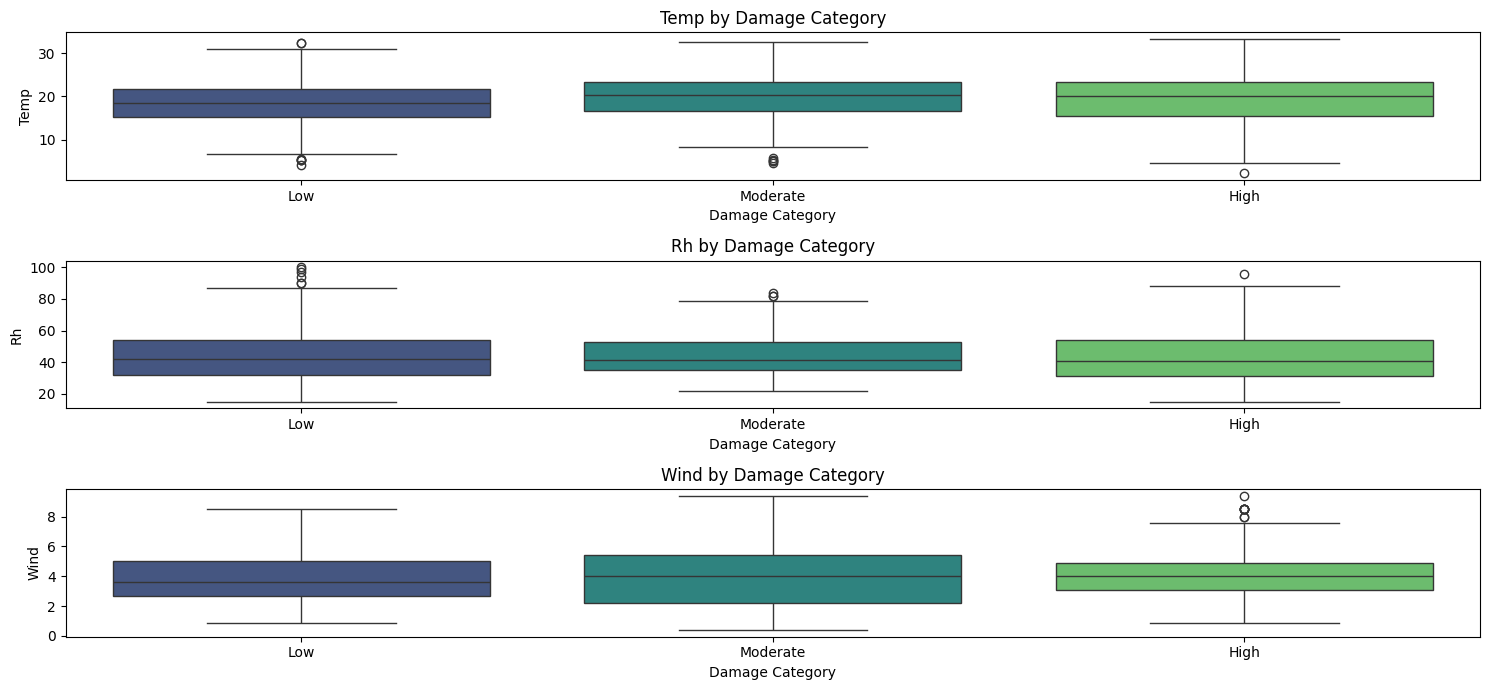

In [15]:
# Define damage categories based on burned area (log_area)
def categorize_damage(log_area):
    if log_area <= 0:  # Adjust threshold as needed
        return "Low"
    elif 0 < log_area <= 2:  # Adjust threshold as needed
        return "Moderate"
    else:
        return "High"

# Apply the function to create a new 'damage_category' column
data['damage_category'] = data['log_area'].apply(categorize_damage)

# List of features to analyze
features = ['temp', 'RH', 'wind']
# Plotting the distribution of features across damage categories
plt.figure(figsize=(15, 7))

for i, feature in enumerate(features, 1):
    plt.subplot(3, 1, i)
    sns.boxplot(x='damage_category', y=feature, data=data, palette='viridis')
    plt.title(f'{feature.capitalize()} by Damage Category')
    plt.xlabel('Damage Category')
    plt.ylabel(feature.capitalize())

plt.tight_layout()
plt.show()


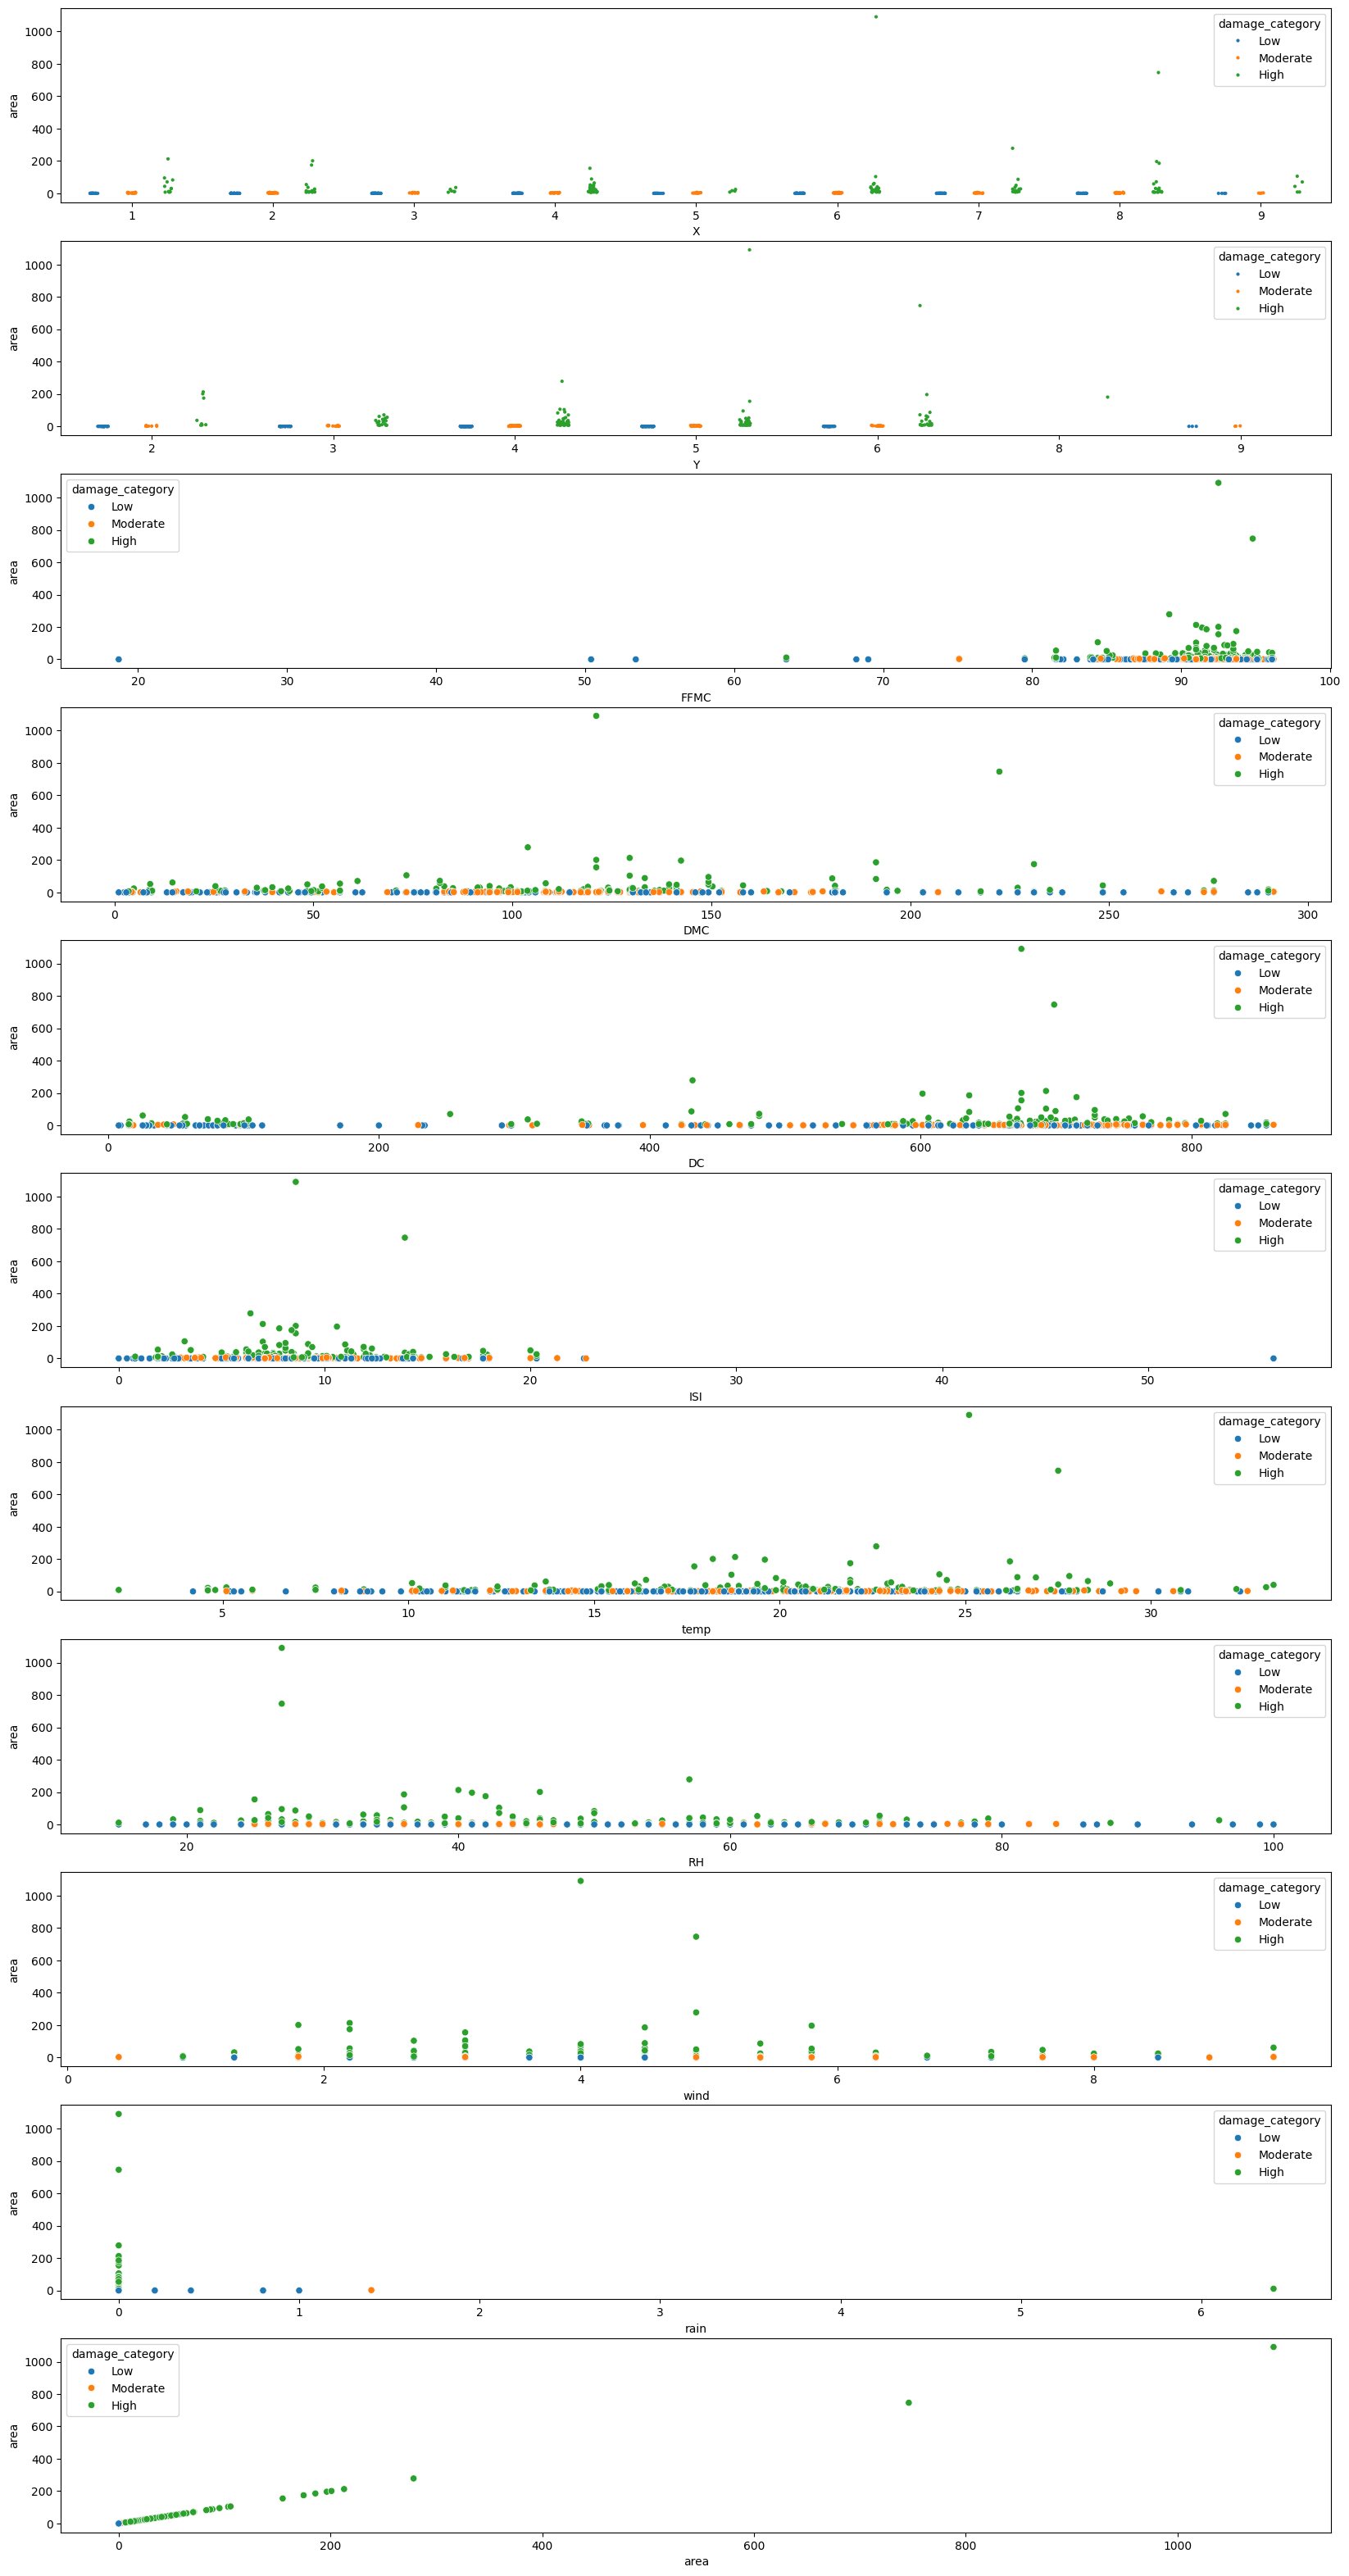

In [16]:
# numerical columns
plt.figure(figsize=(20, 40))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(len(numerical_cols), 1, i)
    if col in ['X', 'Y']:
        # Switch to stripplot to handle overlapping points better
        sns.stripplot(data=data, x=col, y='area', hue='damage_category', dodge=True, size=3)
    else:
        sns.scatterplot(data=data, x=col, y='area', hue='damage_category')
plt.show()

<Figure size 1200x600 with 0 Axes>

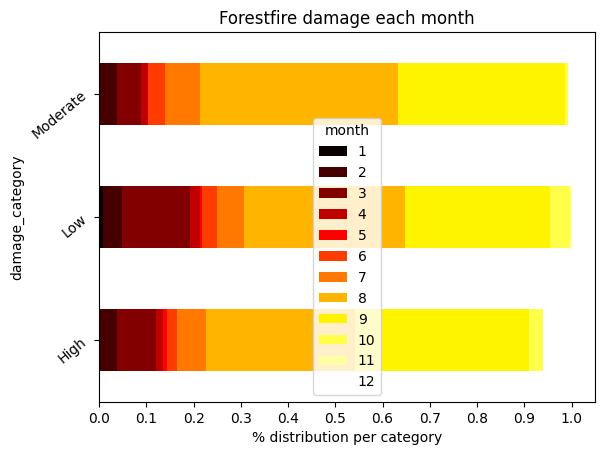

<Figure size 1200x600 with 0 Axes>

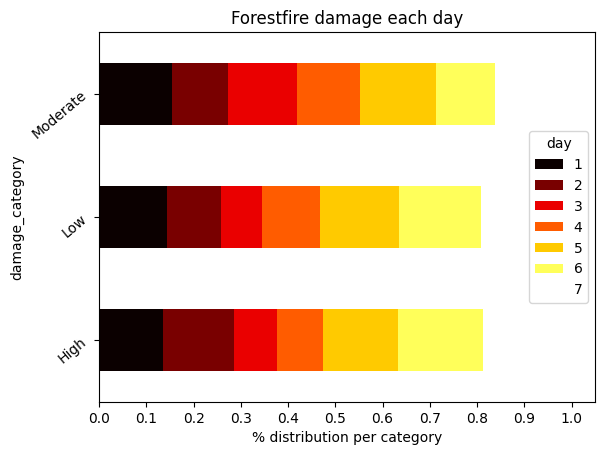

In [17]:
for col in categorical_cols:
    plt.figure(figsize=(12, 6)) # Increased figure size
    cross = pd.crosstab(index = data['damage_category'], columns = data[col], normalize = 'index')
    cross.plot.barh(stacked = True,rot = 40,cmap = 'hot')
    plt.xlabel('% distribution per category')
    plt.xticks(np.arange(0, 1.1, 0.1))
    plt.title("Forestfire damage each {}".format(col))
    plt.show()

Feature Scaling

In [18]:
data.describe()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,log_area
count,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000
mean,4.678363,4.300195,7.485380,4.251462,90.637427,110.989279,549.155166,9.023587,18.887524,44.348928,4.010526,0.021832,12.891598,1.113081
std,2.320059,1.230925,2.275095,2.075038,5.540920,64.191013,247.724594,4.575543,5.828128,16.358803,1.796613,0.297107,63.892586,1.397685
min,1.000000,2.000000,1.000000,1.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000
25%,3.000000,4.000000,7.000000,2.000000,90.200000,68.600000,440.900000,6.400000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000
50%,4.000000,4.000000,8.000000,5.000000,91.600000,108.300000,664.500000,8.400000,19.300000,42.000000,4.000000,0.000000,0.540000,0.431782
75%,7.000000,5.000000,9.000000,6.000000,92.900000,142.400000,713.900000,11.000000,22.800000,53.000000,4.900000,0.000000,6.570000,2.024193
max,9.000000,9.000000,12.000000,7.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,6.995620


In [19]:


from imblearn.over_sampling import SMOTE


# Assuming 'log_area' values below 0 are considered 'minority':
minority_indices = data[data['log_area'] >0].index

# Upsample the minority instances by a factor of 2 (adjust as needed)
upsampled_indices = np.random.choice(minority_indices, size=len(minority_indices) * 4, replace=True)

# Concatenate the original data with the upsampled minority instances
data_oversampled = pd.concat([data, data.loc[upsampled_indices]])

# Proceed with your train-test split and model training using data_oversampled

X = data_oversampled.drop(['area', 'log_area','damage_category'], axis=1)  # Features
y = data_oversampled['log_area']  # Target variable




In [20]:
data_oversampled.shape


(1589, 15)

In [21]:
y.describe()

,log_area
count,1589.000000
mean,1.783783
std,1.391237
min,0.000000
25%,0.741937
50%,1.595339
75%,2.500616
max,6.995620


In [22]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()

# Fit and transform the training data
X_train= scaler.fit_transform(X_train)

# Transform the testing data using the same scaler
X_test= scaler.transform(X_test)


In [23]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=5,
    verbose=2,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print(best_params)

# Create a new RandomForestRegressor model using the best hyperparameters
best_model = RandomForestRegressor(random_state=42, **best_params)

# Fit (train) the model on the training data
best_model.fit(X_train, y_train)

# Make predictions on the test data using the tuned model
y_pred = best_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)


print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")
print(f"Mean Absolute Error (MAE): {mae}")



Fitting 5 folds for each of 81 candidates, totalling 405 fits
{'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Mean Squared Error (MSE): 0.5172433884695027
R-squared (R2): 0.7268733184723108
Mean Absolute Error (MAE): 0.3433472717560176


In [24]:

# Use SelectFromModel to select features
from sklearn.feature_selection import SelectFromModel
select_from_model = SelectFromModel(best_model, threshold='median') # You can adjust the threshold
X_train_selected = select_from_model.fit_transform(X_train, y_train)
X_test_selected = select_from_model.transform(X_test)


# Print the selected feature indices
selected_feature_indices = select_from_model.get_support(indices=True)
print("Selected Feature Indices:", selected_feature_indices)

# Get the names of selected features
selected_feature_names = X.columns[selected_feature_indices]
print("Selected Feature Names:", selected_feature_names)


Selected Feature Indices: [ 0  5  7  8  9 10]
Selected Feature Names: Index(['X', 'DMC', 'ISI', 'temp', 'RH', 'wind'], dtype='object')


In [25]:
param_grid_gb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_gb = GridSearchCV(
    estimator=GradientBoostingRegressor(random_state=42),
    param_grid=param_grid_gb,
    scoring='neg_mean_squared_error',
    cv=5,
    verbose=2,
    n_jobs=-1
)

grid_search_gb.fit(X_train, y_train)


best_params_gb = grid_search_gb.best_params_
print(best_params_gb)

best_gb_model = GradientBoostingRegressor(random_state=42, **best_params_gb)
best_gb_model.fit(X_train, y_train)
y_pred_gb = best_gb_model.predict(X_test)

mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)
mae_gb = mean_absolute_error(y_test, y_pred_gb)

print(f"Gradient Boosting - Mean Squared Error (MSE): {mse_gb}")
print(f"Gradient Boosting - R-squared (R2): {r2_gb}")
print(f"Gradient Boosting - Mean Absolute Error (MAE): {mae_gb}")

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
{'learning_rate': 0.1, 'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Gradient Boosting - Mean Squared Error (MSE): 0.43132951715180323
Gradient Boosting - R-squared (R2): 0.7722395253553664
Gradient Boosting - Mean Absolute Error (MAE): 0.2731334138063017


In [26]:


param_grid_mlp = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive']
}

grid_search_mlp = GridSearchCV(
    estimator=MLPRegressor(random_state=42, max_iter=500),  # Increased max_iter
    param_grid=param_grid_mlp,
    scoring='neg_mean_squared_error',
    cv=5,
    verbose=2,
    n_jobs=-1
)

grid_search_mlp.fit(X_train, y_train)

best_params_mlp = grid_search_mlp.best_params_
best_mlp_model = grid_search_mlp.best_estimator_

print("Best Hyperparameters for MLPRegressor:", best_params_mlp)

y_pred_mlp = best_mlp_model.predict(X_test)
mse_mlp = mean_squared_error(y_test, y_pred_mlp)
r2_mlp = r2_score(y_test, y_pred_mlp)
mae_mlp = mean_absolute_error(y_test, y_pred_mlp)

print("\nNeural Network (MLPRegressor) Results (after GridSearchCV):")
print(f"Mean Squared Error (MSE): {mse_mlp}")
print(f"R-squared (R2): {r2_mlp}")
print(f"Mean Absolute Error (MAE): {mae_mlp}")

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Hyperparameters for MLPRegressor: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50), 'learning_rate': 'constant', 'solver': 'adam'}

Neural Network (MLPRegressor) Results (after GridSearchCV):
Mean Squared Error (MSE): 0.6543331987105663
R-squared (R2): 0.6544840221041273
Mean Absolute Error (MAE): 0.37678234315212805


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


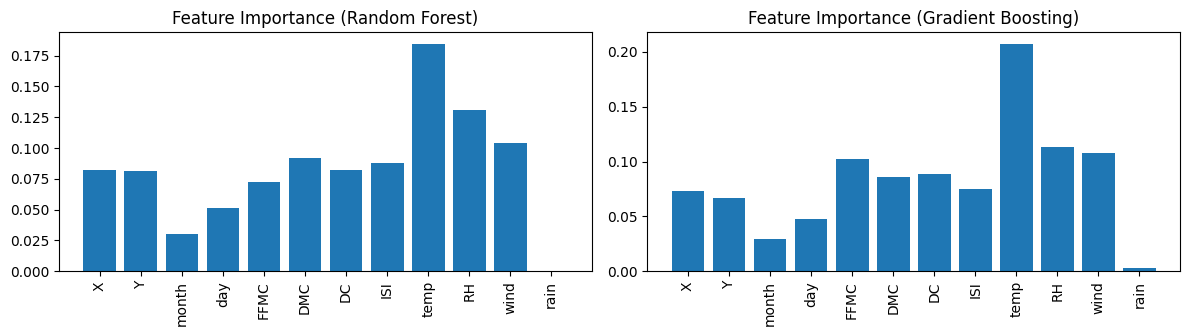

In [27]:


models = {
    'Random Forest': best_model,
    'Gradient Boosting': best_gb_model
}

plt.figure(figsize=(12, 6))

for i, (name, model) in enumerate(models.items()):
    try:
        importances = model.feature_importances_
        plt.subplot(2, 2, i + 1)
        plt.title(f"Feature Importance ({name})")
        plt.bar(X.columns, importances)
        plt.xticks(rotation=90)
        plt.tight_layout()
    except AttributeError:  # Handle models without feature_importances_ (e.g., SVR)
        plt.subplot(2, 2, i + 1)
        plt.title(f"Feature Importance ({name}) - Not Available")
        plt.text(0.5, 0.5, "Not applicable for this model", ha='center', va='center')
plt.show()

In [28]:


from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
# Define the models
models = {
    'XGBoost Regression': XGBRegressor(n_estimators=500, learning_rate=0.01, max_depth=6, min_child_weight=2, subsample=0.8, colsample_bytree=0.8, reg_alpha=0.1, reg_lambda=1, random_state=42, tree_method='hist'),
    'Random Forest Regression': RandomForestRegressor(n_estimators=400, max_depth=15, min_samples_split=5, min_samples_leaf=2, max_features='sqrt', n_jobs=-1, random_state=42),
    'Gradient Boosting Regression': GradientBoostingRegressor(n_estimators=400, learning_rate=0.005, max_depth=5, min_samples_split=4, min_samples_leaf=2, subsample=0.8, random_state=42),
    'Polynomial Regression': make_pipeline(PolynomialFeatures(degree=2), LinearRegression(fit_intercept=True, n_jobs=-1)),
    'Decision Tree Regression': DecisionTreeRegressor(max_depth=8, min_samples_split=10, min_samples_leaf=5, max_features='sqrt', random_state=42),
    'Ridge Regression': Ridge(alpha=1.0, solver='auto', fit_intercept=True, random_state=42),
    'Linear Regression': LinearRegression(fit_intercept=True, n_jobs=-1),
    'Elastic Net Regression': ElasticNet(alpha=0.01, l1_ratio=0.5, max_iter=3000, tol=1e-4, random_state=42),
    'Lasso Regression': Lasso(alpha=0.0005, fit_intercept=True, max_iter=3000, tol=1e-4, random_state=42),
    'Bayesian Ridge Regression': BayesianRidge(max_iter=1000, alpha_1=1e-7, alpha_2=1e-7, lambda_1=1e-7, lambda_2=1e-7, compute_score=True),
    'Quantile Regression': TransformedTargetRegressor(
        regressor=GradientBoostingRegressor(n_estimators=2000, learning_rate=0.01, max_depth=5, min_samples_split=2, min_samples_leaf=2, random_state=42),
        transformer=QuantileTransformer(output_distribution='normal', n_quantiles=1000, random_state=42)
    ),
    'K-Nearest Neighbors Regression': KNeighborsRegressor(n_neighbors=50, weights='distance', algorithm='auto', leaf_size=10, p=1, n_jobs=-1),
    'Support Vector Regression (SVR)': SVR(kernel='rbf', C=10.0, epsilon=0.01, gamma='auto', cache_size=2000, tol=1e-4, shrinking=True),
    'Generalized Additive Models': GaussianProcessRegressor(kernel=RBF(length_scale=0.1) + WhiteKernel(noise_level=0.01), alpha=0.01, n_restarts_optimizer=10, normalize_y=True, random_state=42)
}


In [33]:
import os
import joblib


# Create the 'models' directory if it doesn't exist
if not os.path.exists('models'):
    os.makedirs('models')

results = {}  # Store results for each model

for model_name, model in models.items():
    print(f"Training {model_name}...")
    try:
      model.fit(X_train, y_train)
      y_pred = model.predict(X_test)

      mse = mean_squared_error(y_test, y_pred)
      r2 = r2_score(y_test, y_pred)
      mae = mean_absolute_error(y_test, y_pred)

      results[model_name] = {
          'mse': mse,
          'r2': r2,
          'mae': mae
      }

      # Save the trained model
      model_filename = os.path.join('models', f'{model_name.replace(" ", "_")}.pkl')
      joblib.dump(model, model_filename)
      print(f"{model_name} trained and saved to {model_filename}")

    except Exception as e:
        print(f"Error training {model_name}: {e}")
        results[model_name] = {'error': str(e)}

# Print the results
print("\nModel Training Results:")
for model_name, result in results.items():
    print(f"\n{model_name}:")
    if 'error' in result:
        print(f"Error: {result['error']}")
    else:
        print(f"  MSE: {result['mse']}")
        print(f"  R2: {result['r2']}")
        print(f"  MAE: {result['mae']}")

Training XGBoost Regression...
XGBoost Regression trained and saved to models/XGBoost_Regression.pkl
Training Random Forest Regression...
Random Forest Regression trained and saved to models/Random_Forest_Regression.pkl
Training Gradient Boosting Regression...
Gradient Boosting Regression trained and saved to models/Gradient_Boosting_Regression.pkl
Training Polynomial Regression...
Polynomial Regression trained and saved to models/Polynomial_Regression.pkl
Training Decision Tree Regression...
Decision Tree Regression trained and saved to models/Decision_Tree_Regression.pkl
Training Ridge Regression...
Ridge Regression trained and saved to models/Ridge_Regression.pkl
Training Linear Regression...
Linear Regression trained and saved to models/Linear_Regression.pkl
Training Elastic Net Regression...
Elastic Net Regression trained and saved to models/Elastic_Net_Regression.pkl
Training Lasso Regression...
Lasso Regression trained and saved to models/Lasso_Regression.pkl
Training Bayesian R

/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


Generalized Additive Models trained and saved to models/Generalized_Additive_Models.pkl

Model Training Results:

XGBoost Regression:
  MSE: 0.6445940964392958
  R2: 0.6596266855846248
  MAE: 0.5619863212564884

Random Forest Regression:
  MSE: 0.6017546552046957
  R2: 0.6822477469335735
  MAE: 0.46383722964413177

Gradient Boosting Regression:
  MSE: 1.060616773662906
  R2: 0.4399488785727925
  MAE: 0.8185283684525863

Polynomial Regression:
  MSE: 1.5755248803599373
  R2: 0.16805532592633377
  MAE: 0.9823049120116235

Decision Tree Regression:
  MSE: 1.3474890745190584
  R2: 0.2884680065081058
  MAE: 0.8913838926425814

Ridge Regression:
  MSE: 1.8301066162392128
  R2: 0.03362525635307145
  MAE: 1.0752171248931555

Linear Regression:
  MSE: 1.8303443083001745
  R2: 0.03349974475585604
  MAE: 1.0753704547990464

Elastic Net Regression:
  MSE: 1.8232569430990182
  R2: 0.037242177392635356
  MAE: 1.0716905757708712

Lasso Regression:
  MSE: 1.8296152266007542
  R2: 0.0338847311463335
  

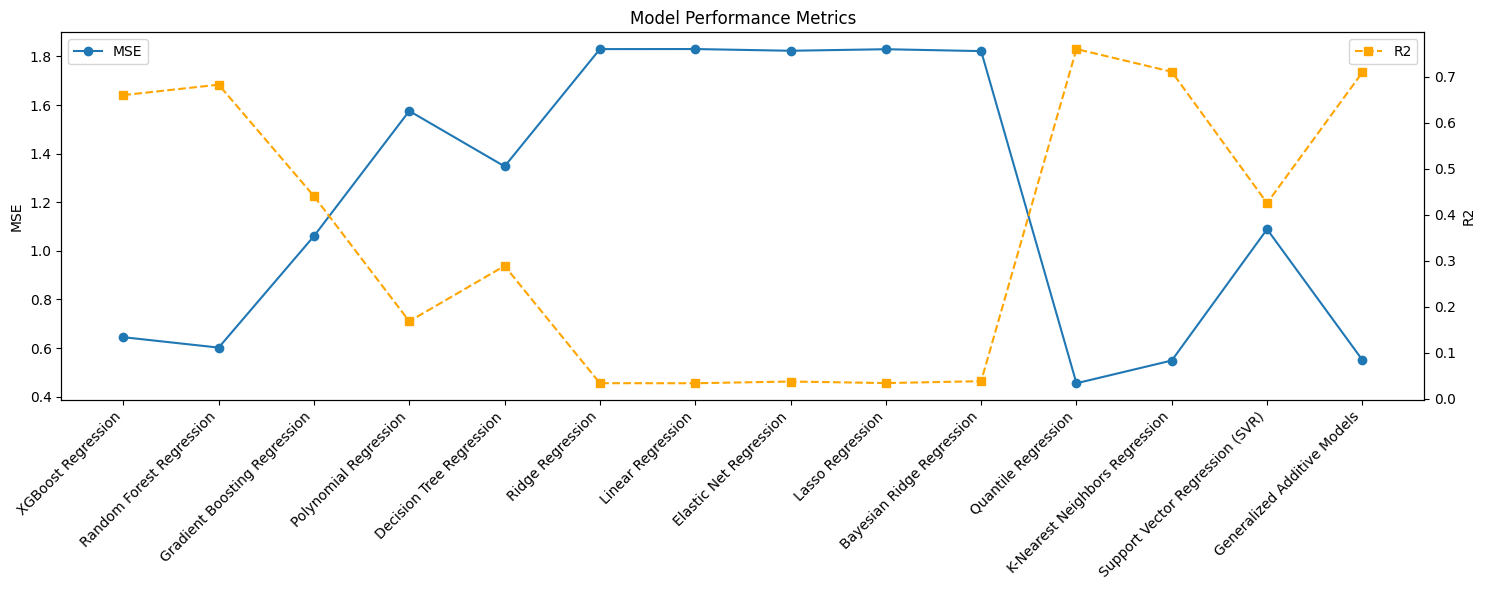

In [47]:
# prompt: plot all results in one plot

import matplotlib.pyplot as plt

# Assuming 'results' dictionary is populated as in your original code

model_names = list(results.keys())
mse_values = [result['mse'] for result in results.values() if 'mse' in result]
r2_values = [result['r2'] for result in results.values() if 'r2' in result]
mae_values = [result['mae'] for result in results.values() if 'mae' in result]


x = range(len(model_names))  # Create x-axis values

plt.figure(figsize=(15, 6))

# Plot MSE values
plt.plot(x, mse_values, marker='o', linestyle='-', label='MSE')
plt.xticks(x, model_names, rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend(loc='upper left')
plt.ylabel("MSE")

# Plot R2 values (secondary y-axis)
plt.twinx()  # Create a second y-axis
plt.plot(x, r2_values, marker='s', linestyle='--', color='orange', label='R2')
plt.legend(loc='upper right')
plt.ylabel("R2")



plt.title('Model Performance Metrics')
plt.tight_layout()
plt.show()

In [51]:
# prompt: make new preduiction on new data for all saved models


# Load the scaler
scaler = StandardScaler()
# Load the saved models
models = {}
import os
for filename in os.listdir('models'):
    if filename.endswith('.pkl'):
        model_name = filename[:-4].replace("_", " ")
        models[model_name] = joblib.load(os.path.join('models', filename))

# Example new data (replace with your actual new data)
new_data = pd.DataFrame({
    'X': [7],
    'Y': [5],
    'month': [8],
    'day': [6],
    'FFMC': [86.2],
    'DMC': [26.2],
    'DC': [94.3],
    'ISI': [5.1],
    'temp': [8.2],
    'RH': [51],
    'wind': [6.7],
    'rain': [0.0]
})

# Preprocess the new data (same as training data)
# Scale the features
scaler.fit(X)
new_data_scaled =scaler.transform(new_data)

# Make predictions with all the loaded models
predictions = {}
for model_name, model in models.items():
    try:
        prediction = model.predict(new_data_scaled)
        predictions[model_name] = prediction[0] # Assuming single prediction
    except Exception as e:
        print(f"Error making predictions with {model_name}: {e}")
        predictions[model_name] = "Error"

# Print the predictions
print("Predictions on New Data:")
for model_name, prediction in predictions.items():
    print(f"{model_name}: {prediction}")

Predictions on New Data:
Linear Regression: 2.4422947054443234
Generalized Additive Models: 1.774680040085359
Decision Tree Regression: 1.5168164022231037
XGBoost Regression: 1.371042013168335
Polynomial Regression: 2.650006273313774
Ridge Regression: 2.4376671554166522
Lasso Regression: 2.4326081551029306
Bayesian Ridge Regression: 2.164214088343728
Gradient Boosting Regression: 1.8105459420273107
Elastic Net Regression: 2.3222708306202287
Quantile Regression: 0.0
K-Nearest Neighbors Regression: 1.7973927459938877
Random Forest Regression: 1.134518114947656
Support Vector Regression (SVR): 1.0245677598352532
